<p style="font-family:Times New Roman; font-size:120%">
    -Aleksander Nistad Sekkelsten
</p>
<h1 style="font-family:Times New Roman; font-size: 300%"><center>  Project 2 Breast Cancer Wisconsin  Data Set</center></h1>
<p style="font-family:Times New Roman; font-size:120%">
    Here, analyze the Wisconsin Breast cancer dataset. I do some tuning on the data, and then do a manual back-prop. code, zygote gradient code, and a flux model on the dataset. I do this for a FFNN and logistic regression and compare. Everything with SGD.
</p>

In [3]:
import Pkg; Pkg.activate(".julia/environments/v1.10/Project.toml")
Pkg.add("MLDataUtils")
using CSV, DataFrames, Flux, Random, Statistics, MLDataUtils, Plots, Optimisers, NBInclude, Zygote
@nbinclude("FYS-STK 4155 Project 2 Methods .ipynb")
@nbinclude("FYS-STK 4155 Project 2 FFNN.ipynb")

  Activating project at `~/.julia/environments/v1.10`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


ConfusionMatrix (generic function with 2 methods)

In [4]:
df = CSV.read("/Users/aleksandersekkelsten/Downloads/data 2.csv", DataFrame)

┌ Warning: thread = 1 warning: only found 32 / 33 columns around data row: 1. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 32 / 33 columns around data row: 2. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 32 / 33 columns around data row: 3. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 32 / 33 columns around data row: 4. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 32 / 33 columns around data row: 5. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 32 / 33 columns around data row: 6. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/

Row,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Column33
,Int64,String1,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Missing
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,missing
2,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,missing
3,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,missing
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,missing
5,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678,missing
6,843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244,missing
7,844359,M,18.25,19.98,119.6,1040.0,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,missing
8,84458202,M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151,missing
9,844981,M,13.0,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072,missing


In [5]:
first(df, 5)

Row,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Column33
,Int64,String1,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Missing
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,missing
2,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,missing
3,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,missing
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,missing
5,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678,missing


In [7]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,id,3.03718e7,8670,906024.0,911320502,0,Int64
2,diagnosis,,B,,M,0,String1
3,radius_mean,14.1273,6.981,13.37,28.11,0,Float64
4,texture_mean,19.2896,9.71,18.84,39.28,0,Float64
5,perimeter_mean,91.969,43.79,86.24,188.5,0,Float64
6,area_mean,654.889,143.5,551.1,2501.0,0,Float64
7,smoothness_mean,0.0963603,0.05263,0.09587,0.1634,0,Float64
8,compactness_mean,0.104341,0.01938,0.09263,0.3454,0,Float64
9,concavity_mean,0.0887993,0.0,0.06154,0.4268,0,Float64


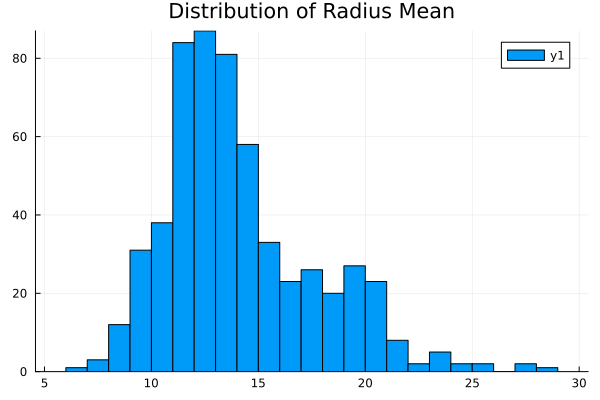

In [26]:
# Plot histogram for one feature
histogram(df[:, :radius_mean], bins=30, title="Distribution of Radius Mean")

In [27]:
# Split data
(train, test) = stratifiedobs((df[:, Not(:diagnosis)], df[1:end, :diagnosis]), 0.8)
X_train, y_train = train
X_train = X_train[:,1:end-1]
X_test, y_test = test
X_test = X_test[:,1:end-1]
X_train

Row,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,8912284,12.89,15.7,84.08,516.6,0.07818,0.0958,0.1115,0.0339,0.1432,0.05935,0.2913,1.389,2.347,23.29,0.006418,0.03961,0.07927,0.01774,0.01878,0.003696,13.9,19.69,92.12,595.6,0.09926,0.2317,0.3344,0.1017,0.1999,0.07127
2,87139402,12.32,12.39,78.85,464.1,0.1028,0.06981,0.03987,0.037,0.1959,0.05955,0.236,0.6656,1.67,17.43,0.008045,0.0118,0.01683,0.01241,0.01924,0.002248,13.5,15.64,86.97,549.1,0.1385,0.1266,0.1242,0.09391,0.2827,0.06771
3,86408,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486
4,9010258,12.56,19.07,81.92,485.8,0.0876,0.1038,0.103,0.04391,0.1533,0.06184,0.3602,1.478,3.212,27.49,0.009853,0.04235,0.06271,0.01966,0.02639,0.004205,13.37,22.43,89.02,547.4,0.1096,0.2002,0.2388,0.09265,0.2121,0.07188
5,8810987,13.86,16.93,90.96,578.9,0.1026,0.1517,0.09901,0.05602,0.2106,0.06916,0.2563,1.194,1.933,22.69,0.00596,0.03438,0.03909,0.01435,0.01939,0.00456,15.75,26.93,104.4,750.1,0.146,0.437,0.4636,0.1654,0.363,0.1059
6,915143,23.09,19.83,152.1,1682.0,0.09342,0.1275,0.1676,0.1003,0.1505,0.05484,1.291,0.7452,9.635,180.2,0.005753,0.03356,0.03976,0.02156,0.02201,0.002897,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277
7,907145,9.742,19.12,61.93,289.7,0.1075,0.08333,0.008934,0.01967,0.2538,0.07029,0.6965,1.747,4.607,43.52,0.01307,0.01885,0.006021,0.01052,0.031,0.004225,11.21,23.17,71.79,380.9,0.1398,0.1352,0.02085,0.04589,0.3196,0.08009
8,865468,13.37,16.39,86.1,553.5,0.07115,0.07325,0.08092,0.028,0.1422,0.05823,0.1639,1.14,1.223,14.66,0.005919,0.0327,0.04957,0.01038,0.01208,0.004076,14.26,22.75,91.99,632.1,0.1025,0.2531,0.3308,0.08978,0.2048,0.07628
9,873885,15.28,22.41,98.92,710.6,0.09057,0.1052,0.05375,0.03263,0.1727,0.06317,0.2054,0.4956,1.344,19.53,0.00329,0.01395,0.01774,0.006009,0.01172,0.002575,17.8,28.03,113.8,973.1,0.1301,0.3299,0.363,0.1226,0.3175,0.09772


In [28]:
XTrain = transpose(Matrix(X_train[:,2:end]))  # Transpose to have samples as columns
XTest = transpose(Matrix(X_test[:,2:end]))  # Transpose to have samples as columns

30×113 transpose(::Matrix{Float64}) with eltype Float64:
   20.44       11.84       12.42     …   10.97        9.738     14.5
   21.78       18.94       15.04         17.2        11.97      10.89
  133.8        75.51       78.61         71.73       61.24      94.28
 1293.0       428.0       476.5         371.5       288.5      640.7
    0.0915      0.08871     0.07926       0.08915     0.0925     0.1101
    0.1131      0.069       0.03393  …    0.1113      0.04102    0.1099
    0.09799     0.02669     0.01053       0.09457     0.0        0.08842
    0.07785     0.01393     0.01108       0.03613     0.0        0.05778
    0.1618      0.1533      0.1546        0.1489      0.1903     0.1856
    0.05557     0.06057     0.05754       0.0664      0.06422    0.06402
    0.5781      0.2222      0.1153   …    0.2574      0.1988     0.2929
    0.9168      0.8652      0.6745        1.376       0.496      0.857
    4.218       1.444       0.757         2.806       1.218      1.928
    ⋮           

In [29]:
yTrain = replace(y_train, "M" => 1.0, "B" => 0.0)
yTest = replace(y_test, "M" => 1.0, "B" => 0.0)

yTrain = reshape(yTrain, 1,:)
yTest = reshape(yTest, 1,:)

1×113 reshape(::PooledArrays.PooledVector{Any, UInt32, Vector{UInt32}}, 1, 113) with eltype Any:
 1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [30]:
# Compute the mean and standard deviation for each feature (row)
feature_means = mean(XTrain, dims=2)
feature_stds = std(XTrain, dims=2)

# Avoid division by zero in case any feature has zero standard deviation
feature_stds[feature_stds .== 0.0] .= 1.0

# Normalize XTrain
XTrain_normalized = (XTrain .- feature_means) ./ feature_stds

# Compute the mean and standard deviation for each feature (row)
feature_means = mean(XTest, dims=2)
feature_stds = std(XTest, dims=2)

# Avoid division by zero in case any feature has zero standard deviation
feature_stds[feature_stds .== 0.0] .= 1.0

# Normalize XTrain
XTest_normalized = (XTest .- feature_means) ./ feature_stds


30×113 Matrix{Float64}:
  1.73545    -0.708929   -0.544076   …  -0.956209    -1.30638    0.0471218
  0.588229   -0.041439   -0.906124      -0.427221    -1.58679   -1.82624
  1.66943    -0.734659   -0.606803      -0.89056     -1.32321    0.0394844
  1.71133    -0.669793   -0.536285      -0.825322    -1.0538    -0.084285
 -0.50191    -0.728858   -1.49755       -0.693067    -0.420567   1.01108
  0.113573   -0.715561   -1.37492    …   0.0797304   -1.24162    0.0534087
  0.104065   -0.745022   -0.937466       0.0633375   -1.06286   -0.00990073
  0.706175   -0.938465   -1.01179       -0.367266    -1.29688    0.189781
 -0.759979   -1.08407    -1.03451       -1.25184      0.326693   0.147488
 -1.01112    -0.325749   -0.741081       0.473388     0.174568   0.147154
  0.544232   -0.602152   -0.946486   …  -0.48877     -0.677525  -0.374421
 -0.466284   -0.564803   -0.928905       0.410462    -1.26971   -0.580459
  0.641387   -0.628785   -0.943351      -0.00514613  -0.732267  -0.407169
  ⋮        

In [31]:
Method = "FFNN"
input_dimension = 30
output_dimension = 1
epochs = 300
batch_size = 80
η = 1e-3

if Method=="FFNN"
    #FFNN
    outs = [64, output_dimension] # FFNN
    activation_functions = [ReLU,Sigmoid]
    model = Chain(
        Dense(size(XTrain, 1), 64, ReLU),
        Dense(64, 1, sigmoid), # FFNN with hidden layer
      # Sigmoid activation for binary classification
    )
else
    #Logistic Regression
    # Define the neural network model
    model = Chain(
        Dense(size(XTrain, 1), 1, sigmoid) 
    )
    outs = [output_dimension]
    activation_functions = [Sigmoid]
end

Chain(
  Dense(30 => 64, ReLU),                # 1_984 parameters
  Dense(64 => 1, σ),                    # 65 parameters
)                   # Total: 4 arrays, 2_049 parameters, 8.254 KiB.

In [34]:
# Loss function: Binary cross-entropy
loss4(model, input, y_true) = Flux.Losses.logitbinarycrossentropy(model(input), y_true)
# Optimizer: Adam optimizer
opt = Flux.setup(Flux.Descent(0.001),model)  # Learning rate of 0.01

# Number of epochs and batch size

num_samples = size(XTrain, 2)
num_batches = ceil(Int, num_samples / batch_size)

# Training loop
for epoch in 1:epochs
    for j in 1:num_batches
        # Batch indices
        a = batch_size * (j - 1) + 1
        b = min(batch_size * j, num_samples)

        # Get batch data
        input = XTrain_normalized[:, a:b]
        label = yTrain[:,a:b]

        # Compute gradients
        grads = gradient(m -> loss4(m,input, label), model)[1]
        # Update model parameters
        Flux.Optimise.update!(opt, model, grads)
    end

    # Print loss every 10 epochs
    if epoch % 50 == 0
        test_loss = loss4(model,XTest_normalized, yTest)
        println("Epoch $epoch Loss: ", test_loss)
    end
end


Epoch 50 Loss: 0.74306254352616
Epoch 100 Loss: 0.7194379943925723
Epoch 150 Loss: 0.7009680852689574
Epoch 200 Loss: 0.6865363415099878
Epoch 250 Loss: 0.6751390659308012
Epoch 300 Loss: 0.6659433096317591


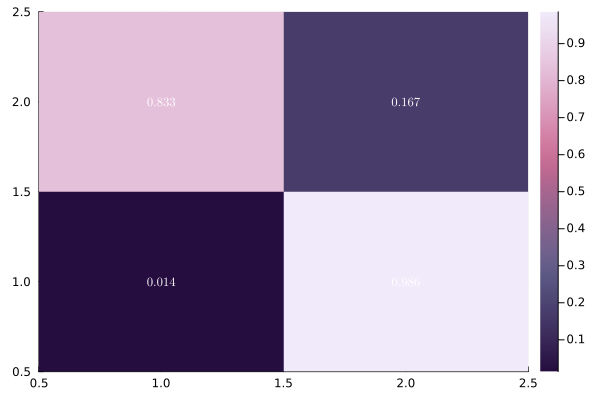

In [35]:
cm, labels = ConfusionMatrix(model,XTest_normalized,yTest)
heatmap(cm, cmap=:acton)
annotate!([(j, i, text(round(cm[i,j],digits=3), 8,"Computer Modern",:white)) for i in 1:2 for j in 1:2])

<h2 style="font-family:Times New Roman; font-weight:bolder; font-size:240%">Manual training, Zygote Gradient</h2>


In [17]:
x_trainM = XTrain_normalized'
x_testM = XTest_normalized'
yTrainM = yTrain'
yTestM = yTest'

113×1 adjoint(reshape(::PooledArrays.PooledVector{Any, UInt32, Vector{UInt32}}, 1, 113)) with eltype Any:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 0.0
 0.0
 1.0
 0.0
 0.0
 0.0
 1.0
 1.0
 0.0
 0.0

In [18]:
function binary_cross_entropy_loss(x_batch, layers, activation_funcs, y_true)
    # Step 1: Perform feed-forward to get predicted value (y_pred)
    y_pred = feed_forward_batched(layers, x_batch, activation_funcs; backprop=false)
    
    # Step 2: Apply sigmoid activation (for binary classification)
    #y_pred = σ.(y_pred)  # Element-wise sigmoid

    # Step 3: Ensure numerical stability by clipping
    eps = 1e-15
    y_pred_clipped = clamp.(y_pred, eps, 1.0 - eps)

    # Step 4: Compute the binary cross-entropy loss
    ce_loss = -mean(y_true .* log.(y_pred_clipped) .+ (1 .- y_true) .* log.(1 .- y_pred_clipped))
    
    return ce_loss
end


binary_cross_entropy_loss (generic function with 1 method)

In [19]:
function trainer(x_train,y_train, x_test, y_test, layers, activation_funcs, learning_rate=0.01, epochs=1000; batch_size, optimizer, loss)
    num_batches=Int(round(length(y_train)/batch_size))
    batch_size=80
    params = initialize(optimizer, layers, learning_rate, num_batches,batch_size;γ=0.9)
    lossHistory = []
    
    for epoch in 1:epochs
        (layers, params) = optimizer(x_train, y_train, layers,  activation_funcs,loss, params)
        if epoch%20==0
            test_loss=loss(x_test, layers, activation_funcs, y_test)
            println("Epoch:  ", epoch, "  Loss: ", test_loss)
            push!(lossHistory, test_loss)
        end
    end
    return layers, lossHistory
end


trainer (generic function with 3 methods)

In [20]:
println(" ------  Training SGD  ------")
layers = create_layers_batch(input_dimension, outs)
layersSGD,lossSGD = trainer(x_trainM, yTrainM, x_testM, yTestM, layers, activation_functions, η, epochs; batch_size=batch_size, optimizer=SGD!, loss=binary_cross_entropy_loss)
β_SGD=feed_forward_batched(layersSGD, x_testM, activation_functions;backprop=false)

println(" ------  Training RMSProp  ------")
layers = create_layers_batch(input_dimension, outs)
layersRMSProp, lossRMSProp = trainer(x_trainM, yTrainM, x_testM, yTestM, layers, activation_functions, η, epochs; batch_size=batch_size, optimizer=RMSProp!, loss=binary_cross_entropy_loss)
β_RMSProp = feed_forward_batched(layersRMSProp, x_testM, activation_functions;backprop=false)

println(" ------  Training Momentum  ------")
layers = create_layers_batch(input_dimension,outs)
layersMomentum, lossMomentum = trainer(x_trainM, yTrainM, x_testM, yTestM, layers, activation_functions, η, epochs; batch_size=batch_size, optimizer=Momentum!, loss=binary_cross_entropy_loss)
β_Momentum = feed_forward_batched(layersMomentum, x_testM, activation_functions;backprop=false)

println(" ------  Training ADAGrad  ------")
layers = create_layers_batch(input_dimension, outs)
layersADAGrad,lossADAGrad = trainer(x_trainM, yTrainM, x_testM, yTestM, layers, activation_functions, η, epochs; batch_size=batch_size, optimizer=AdaGrad!, loss=binary_cross_entropy_loss)
β_ADAGrad = feed_forward_batched(layersADAGrad, x_testM, activation_functions;backprop=false)
println(" ------  Training ADAM  ------")
layers = create_layers_batch(input_dimension,outs)
layersADAM, lossADAM = trainer(x_trainM, yTrainM, x_testM, yTestM, layers, activation_functions, η, epochs; batch_size=batch_size, optimizer=ADAM!, loss=binary_cross_entropy_loss)
β_ADAM = feed_forward_batched(layersADAM, x_testM, activation_functions;backprop=false)


 ------  Training SGD  ------
Epoch:  20  Loss: 0.6230607338993597
Epoch:  40  Loss: 0.47533357746902266
Epoch:  60  Loss: 0.3899332583406083
Epoch:  80  Loss: 0.3339391750352377
Epoch:  100  Loss: 0.29441668221720596
Epoch:  120  Loss: 0.26506942781797665
Epoch:  140  Loss: 0.24234451532085394
Epoch:  160  Loss: 0.22419415133461237
Epoch:  180  Loss: 0.20930501666870785
Epoch:  200  Loss: 0.19686631726227635
Epoch:  220  Loss: 0.18625879352438512
Epoch:  240  Loss: 0.17711193291278873
Epoch:  260  Loss: 0.16912857926911537
Epoch:  280  Loss: 0.1620862314922845
Epoch:  300  Loss: 0.15580359629568308
 ------  Training RMSProp  ------
Epoch:  20  Loss: 0.05921249458194568
Epoch:  40  Loss: 0.027316739745835587
Epoch:  60  Loss: 0.01937295764255407
Epoch:  80  Loss: 0.017627534216703183
Epoch:  100  Loss: 0.018303129209884746
Epoch:  120  Loss: 0.01986987529232313
Epoch:  140  Loss: 0.02244195698379183
Epoch:  160  Loss: 0.024842533807827742
Epoch:  180  Loss: 0.027464804675900813
Epoch: 

113×1 Matrix{Float64}:
 6.465058334763293e-5
 2.9806363579470342e-5
 0.0008592959251106559
 0.0013579466300994729
 5.625482406632909e-7
 1.8936096439029461e-6
 1.0
 0.9999882057071818
 0.00029361762280987386
 3.5078152261963094e-5
 6.651693184452992e-6
 0.9999999999999996
 0.9999999999999996
 ⋮
 0.9330985451028255
 0.9997683011054346
 5.1181236202798e-6
 1.25654105332426e-6
 0.9999999991219728
 1.2904816373148676e-7
 2.1433932647364677e-21
 0.0027700349410580733
 0.9999999999938567
 0.9999999999999996
 0.08653644913152625
 5.3222820455555e-5

In [21]:
# Convert predictions to binary labels (threshold at 0.5)
predictions_binary_normalized = β_ADAM .> 0.5

# Calculate accuracy
accuracy_normalized = sum(predictions_binary_normalized .== yTestM) / length(yTestM)
println("Test Accuracy with Normalized Data: $(accuracy_normalized * 100)%")

Test Accuracy with Normalized Data: 98.23008849557522%


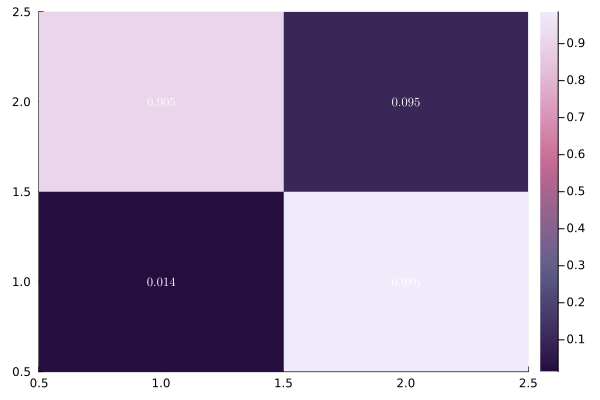

In [22]:
cm, labels = ConfusionMatrix(layersSGD,x_testM,yTest, activation_functions)
heatmap(cm, cmap=:acton)
annotate!([(j, i, text(round(cm[i,j],digits=3), 8,"Computer Modern",:white)) for i in 1:2 for j in 1:2])

<h2 style="font-family:Times New Roman; font-weight:bolder; font-size:240%">Manual Training, Manual Backprop</h2>


In [23]:
num_batches = Int(round(length(yTrain)/batch_size))
layers = create_layers_batch(input_dimension, outs)
for i in 1:epochs
    for j in 1:num_batches
        # Get batch data
        input, label = batch(x_trainM, yTrainM, num_batches, batch_size, j)
        
        output, backs = feed_forward_batched(layers, input, activation_functions; backprop=true)
        layers = BackwardsPropagation(layers, label, backs, activation_functions,0.001)
    end
    if i%100==0
        println("Epoch: $i Loss: ", binary_cross_entropy_loss(x_testM, layers, activation_functions, yTestM))
    end
end

Epoch: 100 Loss: 0.15489390077968385
Epoch: 200 Loss: 0.12174403126474016
Epoch: 300 Loss: 0.10482870790640209


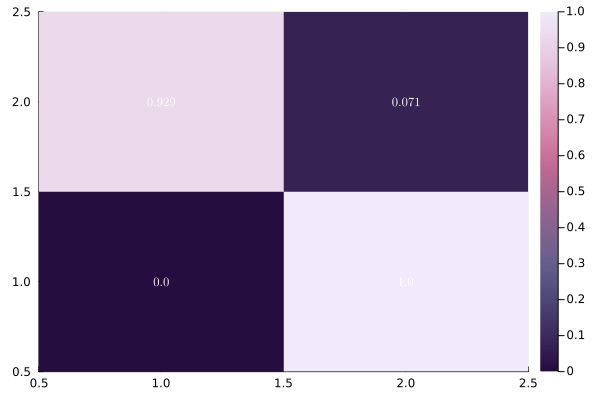

In [24]:
cm, labels = ConfusionMatrix(layers,x_testM,yTest, activation_functions)
heatmap(cm, cmap=:acton)
annotate!([(j, i, text(round(cm[i,j],digits=3), 8,"Computer Modern",:white)) for i in 1:2 for j in 1:2])